In [228]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jsonlines
import nltk
from nltk.tokenize import word_tokenize

In [229]:
import jsonlines

# 打开数据
with jsonlines.open('d:/GitRepo/Python_E-commercial_Review_Analysis/Magazine_Subscriptions.jsonl') as reader:
    data = [obj for obj in reader]

df = pd.DataFrame(data)
df


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Great pictures and recipes,Wonderful recipes in this magazine.,[],B00HLSSQKK,B00HLSSQKK,AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,1608046142433,0,True
1,4.0,great for kids who love sports!,Great sports magazine that's on my 9 year olds...,[],B002PXW04Y,B002PXW04Y,AHORTSSMI6ZZFUFWMPT4UFR2ISUQ,1470972512000,1,True
2,5.0,A great look at what's new on the kosher scene...,"""Joy of Kosher"" magazine fills a much-needed n...",[],B00HCR5090,B00HCR5090,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1396827173000,4,False
3,5.0,"If you enjoy reading an eye-catching, easy-to-...",I've been addicted to Martha Stewart's Everyda...,[],B0000ARXXS,B0000ARXXS,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1181880255000,4,False
4,1.0,Too many “ gear ads” !!,Too many ads!,[],B0025ZOVEO,B0025ZOVEO,AFUB7CHTXRPD447QVQCHBZVN2IPQ,1591046680246,13,True
...,...,...,...,...,...,...,...,...,...,...
71492,5.0,Automobile Mag,I subscribe to three car magazines. Road and T...,[],B000H1R17C,B000H1R17C,AFNVALK6YKRI2F6IJ7S3CEXHGAPA,1176481717000,6,False
71493,4.0,Pairs well with a subscription to WineSpectato...,Though the magazine covers the industry well I...,[],B002PXVZ8G,B002PXVZ8G,AEV4WH6WAC5SXNMVU4IKV24GVUTA,1552675210945,0,True
71494,5.0,Refreshing and fun,My daughter wanted to subscribe to a magazine ...,[],B00024CY7Q,B00024CY7Q,AFKPP4DCSTEXZL2JBST22XVP5OWA,1192496001000,50,False
71495,2.0,Not Fair,"Dear Sirs,<br /><br />Two days ago I ordered H...",[],B001THPA1M,B001THPA1M,AH724KI32N5DSQXBMFGGT2WBAQPQ,1288714432000,0,True


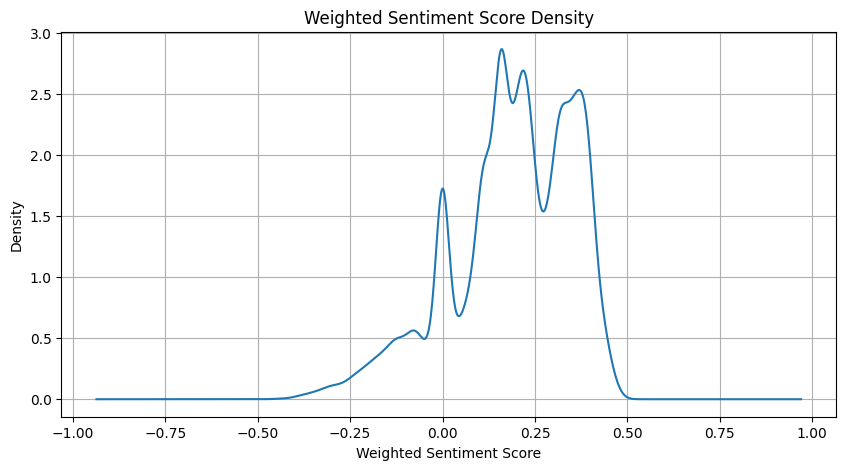

In [264]:
# 描述性统计
df.describe()
# 绘制概率密度分布图
df['weighted_sentiment'].plot(kind='kde', figsize=(10, 5), title='Weighted Sentiment Score Density')
plt.xlabel('Weighted Sentiment Score')
plt.ylabel('Density')
plt.grid()
plt.show()

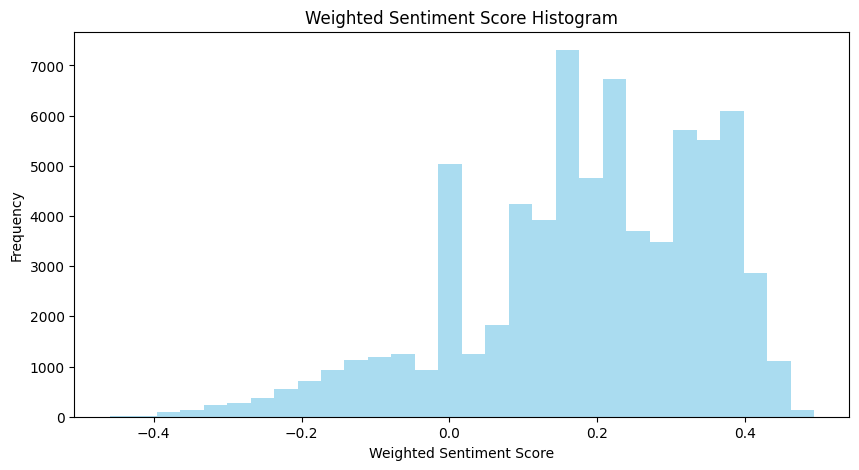

In [ ]:
# 绘制频数分布直方图
plt.figure(figsize=(10, 5))
df['weighted_sentiment'].hist(bins=30, alpha=0.7, color='skyblue')
plt.title('Weighted Sentiment Score Histogram')
plt.xlabel('Weighted Sentiment Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [270]:
# 计算df数据的频率分布
# 计算每个评分(rating)的频率分布
rating_freq = df['rating'].value_counts(normalize=True).sort_index()
print("Rating frequency distribution:")
print(rating_freq)

# 计算加权情感分数(weighted_sentiment)的频率分布（分箱）
weighted_sentiment_freq = pd.cut(df['weighted_sentiment'], bins=10).value_counts(normalize=True).sort_index()
print("\nWeighted Sentiment frequency distribution (binned):")
print(weighted_sentiment_freq)

Rating frequency distribution:
rating
1.0    0.135460
2.0    0.055289
3.0    0.070395
4.0    0.114774
5.0    0.624082
Name: proportion, dtype: float64

Weighted Sentiment frequency distribution (binned):
weighted_sentiment
(-0.46, -0.364]      0.001650
(-0.364, -0.269]     0.008728
(-0.269, -0.174]     0.022980
(-0.174, -0.0784]    0.045708
(-0.0784, 0.0169]    0.100955
(0.0169, 0.112]      0.102158
(0.112, 0.207]       0.223562
(0.207, 0.303]       0.194442
(0.303, 0.398]       0.242276
(0.398, 0.493]       0.057541
Name: proportion, dtype: float64


In [271]:
# 检查并处理缺失值

# 检查缺失值
missing_mask = df.isnull()
# 删除缺失值
clean_data = df.dropna()
clean_data


,rating,title,text,helpful_vote,title_sentiment,text_sentiment,weighted_sentiment
0,5.0,"[Great, pictures, and, recipes]","[Wonderful, recipes, in, this, magazine, .]",0,0.6249,0.5719,0.299200
1,4.0,"[great, for, kids, who, love, sports, !]","[Great, sports, magazine, that, 's, on, my, 9,...",1,0.8622,0.6588,0.380250
2,5.0,"[A, great, look, at, what, 's, new, on, the, k...","[``, Joy, of, Kosher, '', magazine, fills, a, ...",4,0.6588,0.9988,0.414400
3,5.0,"[If, you, enjoy, reading, an, eye-catching, ,,...","[I, 've, been, addicted, to, Martha, Stewart, ...",4,0.8074,0.9940,0.450350
4,1.0,"[Too, many, “, gear, ads, ”, !, !]","[Too, many, ads, !]",13,0.0000,0.0000,0.000000
...,...,...,...,...,...,...,...
71492,5.0,"[Automobile, Mag]","[I, subscribe, to, three, car, magazines, ., R...",6,0.0000,0.8020,0.200500
71493,4.0,"[Pairs, well, with, a, subscription, to, WineS...","[Though, the, magazine, covers, the, industry,...",0,0.2732,0.7269,0.250025
71494,5.0,"[Refreshing, and, fun]","[My, daughter, wanted, to, subscribe, to, a, m...",50,0.5106,0.9819,0.373125
71495,2.0,"[Not, Fair]","[Dear, Sirs, ,, <, br, /, >, <, br, /, >, Two,...",0,-0.2411,0.3447,0.025900


In [272]:
# 清洗掉不需要的数据字段

df = df.drop(columns=['asin','images','verified_purchase','timestamp','user_id','parent_asin'])

df


KeyError: "['asin', 'images', 'verified_purchase', 'timestamp', 'user_id', 'parent_asin'] not found in axis"

In [ ]:
# 文本处理

# 分词

# 对clean_data中的title字段进行分词

df['text'] = df['text'].apply(word_tokenize)
df['title'] = df['title'].apply(word_tokenize)
df


,rating,title,text,helpful_vote
0,5.0,"[Great, pictures, and, recipes]","[Wonderful, recipes, in, this, magazine, .]",0
1,4.0,"[great, for, kids, who, love, sports, !]","[Great, sports, magazine, that, 's, on, my, 9,...",1
2,5.0,"[A, great, look, at, what, 's, new, on, the, k...","[``, Joy, of, Kosher, '', magazine, fills, a, ...",4
3,5.0,"[If, you, enjoy, reading, an, eye-catching, ,,...","[I, 've, been, addicted, to, Martha, Stewart, ...",4
4,1.0,"[Too, many, “, gear, ads, ”, !, !]","[Too, many, ads, !]",13
...,...,...,...,...
71492,5.0,"[Automobile, Mag]","[I, subscribe, to, three, car, magazines, ., R...",6
71493,4.0,"[Pairs, well, with, a, subscription, to, WineS...","[Though, the, magazine, covers, the, industry,...",0
71494,5.0,"[Refreshing, and, fun]","[My, daughter, wanted, to, subscribe, to, a, m...",50
71495,2.0,"[Not, Fair]","[Dear, Sirs, ,, <, br, /, >, <, br, /, >, Two,...",0


In [ ]:
# 将df中text和title字段的数据导出到一个Series对象
text_title_series = pd.concat([df['text'], df['title']])
text_title_list = []
for i in text_title_series:
    for j in i:
        text_title_list.append(j)
text_title_list

['Wonderful',
 'recipes',
 'in',
 'this',
 'magazine',
 '.',
 'Great',
 'sports',
 'magazine',
 'that',
 "'s",
 'on',
 'my',
 '9',
 'year',
 'olds',
 'level',
 '!',
 '``',
 'Joy',
 'of',
 'Kosher',
 "''",
 'magazine',
 'fills',
 'a',
 'much-needed',
 'niche',
 'for',
 'kosher',
 'recipes',
 ',',
 'cookbook',
 'reviews',
 ',',
 'and',
 'the',
 'kosher',
 'lifestyle',
 'not',
 'found',
 'in',
 'other',
 'mainstream',
 'magazines',
 '.',
 'Sporting',
 'beautifully-photographed',
 'covers',
 'and',
 'spreads',
 'that',
 'are',
 'equally',
 'at',
 'home',
 'next',
 'to',
 'powerhouse',
 'food',
 'and',
 'cooking',
 'magazines',
 ',',
 '``',
 'Joy',
 'of',
 'Kosher',
 "''",
 '(',
 'which',
 'merged',
 'with',
 'Bitayavon',
 'in',
 '2012',
 ')',
 'is',
 'your',
 'source',
 'for',
 'all',
 'things',
 'kosher',
 '.',
 'Far',
 'beyond',
 'mere',
 'recipes',
 ',',
 '``',
 'Joy',
 'of',
 'Kosher',
 "''",
 'includes',
 'news',
 'on',
 'kosher',
 'restaurants',
 ',',
 'kosher',
 'wines',
 ',',
 'coo

In [ ]:
# 去除无意义的词
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_text_title_list = [word for word in text_title_list if word.lower() not in stop_words]
filtered_text_title_list

# 去除标点符号
import string
filtered_text_title_list = [word for word in filtered_text_title_list if word not in string.punctuation]
filtered_text_title_list

# 去除数字
filtered_text_title_list = [word for word in filtered_text_title_list if not word.isdigit()]
filtered_text_title_list

lower_text_title_list = [word.lower() for word in filtered_text_title_list]
lower_text_title_list

# 词干提取
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_text_title_list = [stemmer.stem(word) for word in lower_text_title_list]
# 词形还原
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_text_title_list = [lemmatizer.lemmatize(word) for word in lower_text_title_list]
lemmatized_text_title_list = [
    i for i in lemmatized_text_title_list
    if i not in ["'s", "``", "''", "br","n't", "ca", "wa", "wo", "ll", "m", "s", "t", "ve", "y", "d"]
]
lemmatized_text_title_list


['wonderful',
 'recipe',
 'magazine',
 'great',
 'sport',
 'magazine',
 'year',
 'old',
 'level',
 'joy',
 'kosher',
 'magazine',
 'fill',
 'much-needed',
 'niche',
 'kosher',
 'recipe',
 'cookbook',
 'review',
 'kosher',
 'lifestyle',
 'found',
 'mainstream',
 'magazine',
 'sporting',
 'beautifully-photographed',
 'cover',
 'spread',
 'equally',
 'home',
 'next',
 'powerhouse',
 'food',
 'cooking',
 'magazine',
 'joy',
 'kosher',
 'merged',
 'bitayavon',
 'source',
 'thing',
 'kosher',
 'far',
 'beyond',
 'mere',
 'recipe',
 'joy',
 'kosher',
 'includes',
 'news',
 'kosher',
 'restaurant',
 'kosher',
 'wine',
 'cookbook',
 'kitchen',
 'tool',
 'holiday',
 'decorating',
 'tip',
 'article',
 'kosher',
 'travel',
 "'ll",
 'read',
 'interview',
 'kosher',
 'chef',
 'entrepreneur',
 'spotlight',
 'new',
 'kosher',
 'product',
 'kosher',
 'wine',
 'wine',
 'pairing',
 'given',
 'plenty',
 'space',
 'dozen',
 'up-and-coming',
 'kosher',
 'winery',
 'israel',
 'many',
 'top-rated',
 'wine',
 

[('magazine', 65171), ('br', 26936), ('great', 26871), ("'s", 19039), ('love', 16947), ('good', 15775), ("n't", 15503), ('subscription', 14253), ('articles', 13348), ('like', 12793), ('stars', 12494), ('one', 11759), ('read', 11609), ('issue', 11226), ('five', 9375), ('get', 8666), ('would', 7697), ('...', 7397), ('magazines', 7391), ('years', 7383), ('time', 6747), ('reading', 6588), ('year', 6529), ('many', 6326), ('always', 6242), ('new', 6210), ('recipes', 6147), ('every', 6073), ('price', 5932), ('best', 5870)]


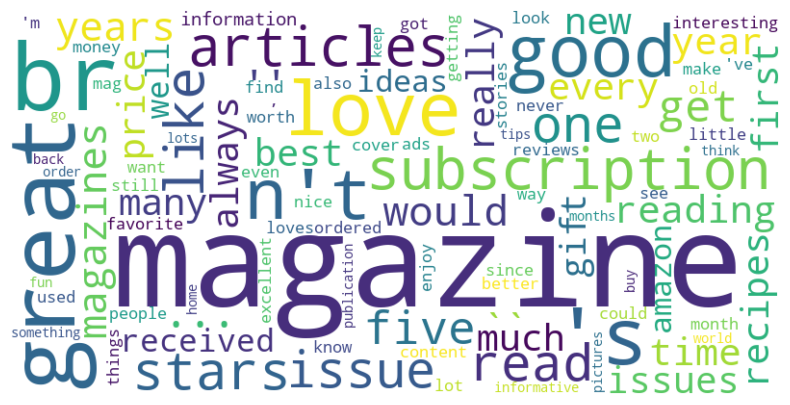

In [ ]:
# 统计词频
from collections import Counter
word_counts = Counter(lower_text_title_list)
word_counts

# 统计前10个高频词
top_30_words = word_counts.most_common(30)
print(top_30_words)

# 可视化词云
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
# 设置词云参数
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis',
    stopwords=STOPWORDS
).generate_from_frequencies(dict(word_counts))
# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# 情感分析
from nltk.sentiment import SentimentIntensityAnalyzer
# 创建情感分析器
sia = SentimentIntensityAnalyzer()
# 对lemmatized_text_title_list中的词进行情感指数计算
sentiment_scores = []
for word in lemmatized_text_title_list:
    score = sia.polarity_scores(word)
    sentiment_scores.append(score)
# 将情感分数转换为DataFrame
sentiment_df = pd.DataFrame(sentiment_scores)
sentiment_df

# 将lemmatized_text_title_list中的词和情感分数合并为一个DataFrame
sentiment_df = pd.DataFrame({
    'word': lemmatized_text_title_list,
    'compound': [score['compound'] for score in sentiment_scores],
    'pos': [score['pos'] for score in sentiment_scores],
    'neg': [score['neg'] for score in sentiment_scores],
    'neu': [score['neu'] for score in sentiment_scores]
})
sentiment_df


,word,compound,pos,neg,neu
0,wonderful,0.5719,1.0,0.0,0.0
1,recipe,0.0000,0.0,0.0,1.0
2,magazine,0.0000,0.0,0.0,1.0
3,great,0.6249,1.0,0.0,0.0
4,sport,0.0000,0.0,0.0,1.0
...,...,...,...,...,...
1603121,refreshing,0.0000,0.0,0.0,1.0
1603122,fun,0.5106,1.0,0.0,0.0
1603123,fair,0.3182,1.0,0.0,0.0
1603124,awesome,0.6249,1.0,0.0,0.0


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# 计算原标题与原内容的情感分数
# 对df中的text和title字段进行情感分析

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    # text is a list of tokens, join to string
    return sia.polarity_scores(' '.join(text))['compound']

df['title_sentiment'] = df['title'].apply(get_sentiment)
df['text_sentiment'] = df['text'].apply(get_sentiment)

df

,rating,title,text,helpful_vote,title_sentiment,text_sentiment,weighted_sentiment
0,5.0,"[Great, pictures, and, recipes]","[Wonderful, recipes, in, this, magazine, .]",0,0.6249,0.5719,0.299200
1,4.0,"[great, for, kids, who, love, sports, !]","[Great, sports, magazine, that, 's, on, my, 9,...",1,0.8622,0.6588,0.380250
2,5.0,"[A, great, look, at, what, 's, new, on, the, k...","[``, Joy, of, Kosher, '', magazine, fills, a, ...",4,0.6588,0.9988,0.414400
3,5.0,"[If, you, enjoy, reading, an, eye-catching, ,,...","[I, 've, been, addicted, to, Martha, Stewart, ...",4,0.8074,0.9940,0.450350
4,1.0,"[Too, many, “, gear, ads, ”, !, !]","[Too, many, ads, !]",13,0.0000,0.0000,0.000000
...,...,...,...,...,...,...,...
71492,5.0,"[Automobile, Mag]","[I, subscribe, to, three, car, magazines, ., R...",6,0.0000,0.8020,0.200500
71493,4.0,"[Pairs, well, with, a, subscription, to, WineS...","[Though, the, magazine, covers, the, industry,...",0,0.2732,0.7269,0.250025
71494,5.0,"[Refreshing, and, fun]","[My, daughter, wanted, to, subscribe, to, a, m...",50,0.5106,0.9819,0.373125
71495,2.0,"[Not, Fair]","[Dear, Sirs, ,, <, br, /, >, <, br, /, >, Two,...",0,-0.2411,0.3447,0.025900


In [ ]:
# 对情感评分进行加权计算
def weighted_sentiment(row):
    return (row['title_sentiment'] * 0.5 + row['text_sentiment'] * 0.5) / 2
df['weighted_sentiment'] = df.apply(weighted_sentiment, axis=1)
df

,rating,title,text,helpful_vote,title_sentiment,text_sentiment,weighted_sentiment
0,5.0,"[Great, pictures, and, recipes]","[Wonderful, recipes, in, this, magazine, .]",0,0.6249,0.5719,0.299200
1,4.0,"[great, for, kids, who, love, sports, !]","[Great, sports, magazine, that, 's, on, my, 9,...",1,0.8622,0.6588,0.380250
2,5.0,"[A, great, look, at, what, 's, new, on, the, k...","[``, Joy, of, Kosher, '', magazine, fills, a, ...",4,0.6588,0.9988,0.414400
3,5.0,"[If, you, enjoy, reading, an, eye-catching, ,,...","[I, 've, been, addicted, to, Martha, Stewart, ...",4,0.8074,0.9940,0.450350
4,1.0,"[Too, many, “, gear, ads, ”, !, !]","[Too, many, ads, !]",13,0.0000,0.0000,0.000000
...,...,...,...,...,...,...,...
71492,5.0,"[Automobile, Mag]","[I, subscribe, to, three, car, magazines, ., R...",6,0.0000,0.8020,0.200500
71493,4.0,"[Pairs, well, with, a, subscription, to, WineS...","[Though, the, magazine, covers, the, industry,...",0,0.2732,0.7269,0.250025
71494,5.0,"[Refreshing, and, fun]","[My, daughter, wanted, to, subscribe, to, a, m...",50,0.5106,0.9819,0.373125
71495,2.0,"[Not, Fair]","[Dear, Sirs, ,, <, br, /, >, <, br, /, >, Two,...",0,-0.2411,0.3447,0.025900


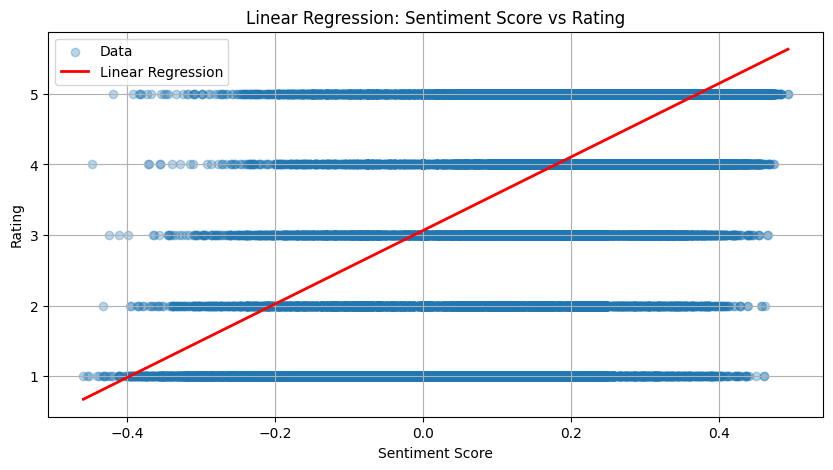

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 拟合线性回归模型
X = df['weighted_sentiment'].values.reshape(-1, 1)
y = df['rating'].values
reg = LinearRegression()
reg.fit(X, y)

# 预测
x_range = np.linspace(df['weighted_sentiment'].min(), df['weighted_sentiment'].max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

# 可视化
plt.figure(figsize=(10, 5))
plt.scatter(df['weighted_sentiment'], df['rating'], alpha=0.3, label='Data')
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression: Sentiment Score vs Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.legend()
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

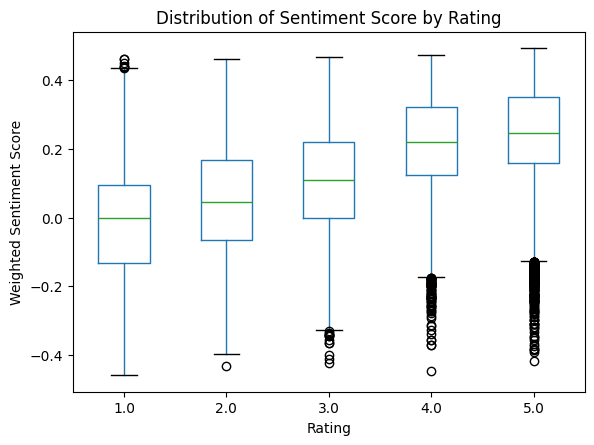

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='weighted_sentiment', by='rating', grid=False)
plt.title('Distribution of Sentiment Score by Rating')
plt.suptitle('')
plt.xlabel('Rating')
plt.ylabel('Weighted Sentiment Score')
plt.show()


Correlation between sentiment score and rating: 0.5886807294429048


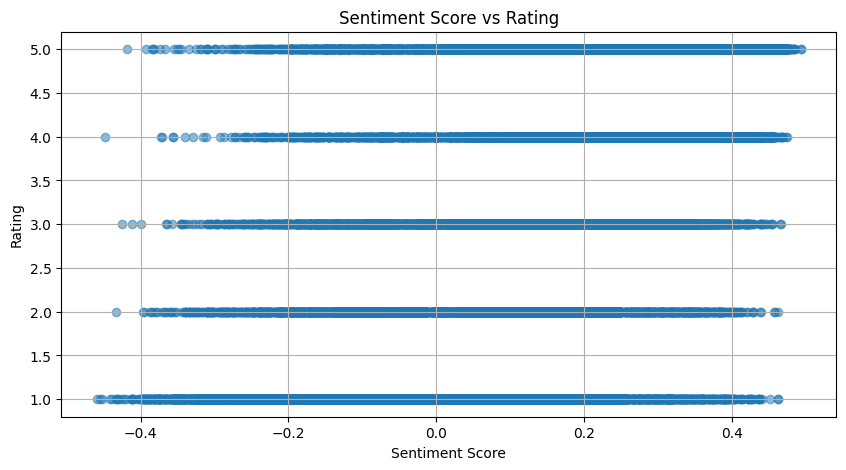

In [ ]:
# 计算情感分数与评分rating的相关性
correlation = df['weighted_sentiment'].corr(df['rating'])
print(f"Correlation between sentiment score and rating: {correlation}")
# 可视化情感分数与评分的关系
plt.figure(figsize=(10, 5))
plt.scatter(df['weighted_sentiment'], df['rating'], alpha=0.5)
plt.title('Sentiment Score vs Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.grid()
plt.show()

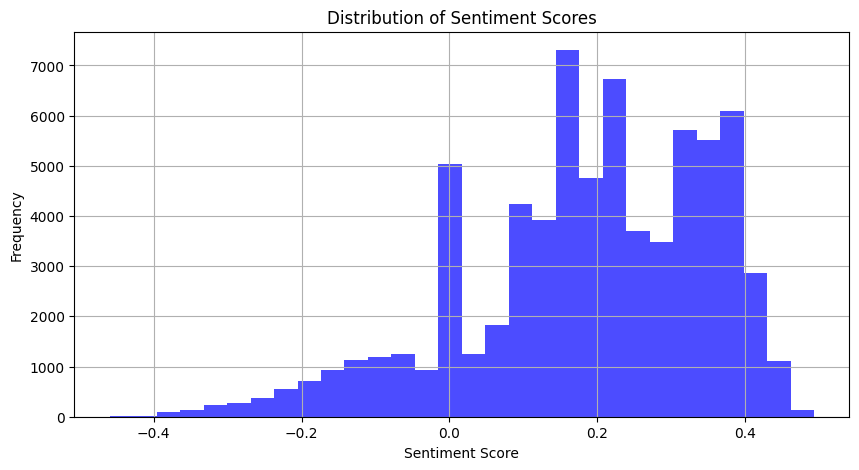

In [ ]:
# 计算情感分数的分布
plt.figure(figsize=(10, 5))
plt.hist(df['weighted_sentiment'], bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()
